# Objective:

To build a classification model that classifies the side effects of a particular drug by age, gender and race

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the dataset
data = pd.read_csv("F:\\pythonprogramming\\dataset.csv").drop(columns=['Unnamed: 0'])
data.head(10) 

,name,age,gender,race,urlDrugName,rating,effectiveness,condition,sideEffects
0,Tim Elliot,53.0,M,Asian,enalapril,4,Highly Effective,management of congestive heart failure,Mild Side Effects
1,Lewis Lee Lembke,47.0,M,White,ortho-tri-cyclen,1,Highly Effective,birth prevention,Severe Side Effects
2,John Paul Quintero,23.0,M,Hispanic,ponstel,10,Highly Effective,menstrual cramps,No Side Effects
3,Matthew Hoffman,32.0,M,White,prilosec,3,Marginally Effective,acid reflux,Mild Side Effects
4,Michael Rodriguez,39.0,M,Hispanic,lyrica,2,Marginally Effective,fibromyalgia,Severe Side Effects
5,Kenneth Joe Brown,18.0,M,White,propecia,1,Ineffective,hair loss,Severe Side Effects
6,Kenneth Arnold Buck,22.0,M,Hispanic,vyvanse,9,Highly Effective,add,Mild Side Effects
7,Brock Nichols,35.0,M,White,elavil,10,Considerably Effective,depression,No Side Effects
8,Autumn Steele,34.0,F,White,xanax,10,Highly Effective,panic disorder,No Side Effects
9,Leslie Sapp III,47.0,M,Black,claritin,1,Ineffective,allergies,Extremely Severe Side Effects


In [3]:
# To verify if any null values present
data.isnull().sum()

name               0
age                0
gender             0
race               0
urlDrugName        0
rating             0
effectiveness      0
condition        141
sideEffects        0
dtype: int64

In [4]:
#how many rows and columns
data.shape

(440550, 9)

In [5]:
#what all variables and modules we have created or loaded into our computer memory
%whos

Variable                 Type         Data/Info
-----------------------------------------------
RandomForestClassifier   ABCMeta      <class 'sklearn.ensemble.<...>.RandomForestClassifier'>
SVC                      ABCMeta      <class 'sklearn.svm._classes.SVC'>
StandardScaler           type         <class 'sklearn.preproces<...>ng._data.StandardScaler'>
classification_report    function     <function classification_<...>rt at 0x00000289ED318AF0>
data                     DataFrame                          nam<...>[440550 rows x 9 columns]
np                       module       <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
pd                       module       <module 'pandas' from 'C:<...>es\\pandas\\__init__.py'>
plt                      module       <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>
sns                      module       <module 'seaborn' from 'C<...>s\\seaborn\\__init__.py'>
train_test_split         function     <function train_test_split at 0x00000289E

In [6]:
# the datatypes
data.dtypes

name              object
age              float64
gender            object
race              object
urlDrugName       object
rating             int64
effectiveness     object
condition         object
sideEffects       object
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440550 entries, 0 to 440549
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   name           440550 non-null  object 
 1   age            440550 non-null  float64
 2   gender         440550 non-null  object 
 3   race           440550 non-null  object 
 4   urlDrugName    440550 non-null  object 
 5   rating         440550 non-null  int64  
 6   effectiveness  440550 non-null  object 
 7   condition      440409 non-null  object 
 8   sideEffects    440550 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 30.3+ MB


In [8]:
data.columns

Index(['name', 'age', 'gender', 'race', 'urlDrugName', 'rating',
       'effectiveness', 'condition', 'sideEffects'],
      dtype='object')

# Exploratory Data Analysis

In [9]:
#Data Summary of numeric data
data.describe()

,age,rating
count,440550.000000,440550.000000
mean,36.549750,7.006254
std,12.693066,2.937025
min,6.000000,1.000000
25%,27.000000,5.000000
50%,35.000000,8.000000
75%,45.000000,9.000000
max,91.000000,10.000000


In [10]:
#Data Summary of non-numeric data
data.describe(include=['object', 'bool'])

,name,gender,race,urlDrugName,effectiveness,condition,sideEffects
count,440550,440550,440550,440550,440550,440409,440550
unique,4851,2,6,502,5,1426,5
top,TK TK,M,White,lexapro,Highly Effective,depression,Mild Side Effects
freq,2610,420570,222840,8936,188584,33469,144494


# Univariate Analysis

1.List of drugs available

<function matplotlib.pyplot.show(close=None, block=None)>

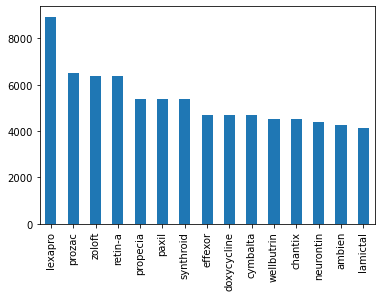

In [11]:
data['urlDrugName'].value_counts().head(15).plot(kind='bar')
plt.rcParams['figure.figsize']=(10,7)
plt.show

2.The ratings of the drugs

<function matplotlib.pyplot.show(close=None, block=None)>

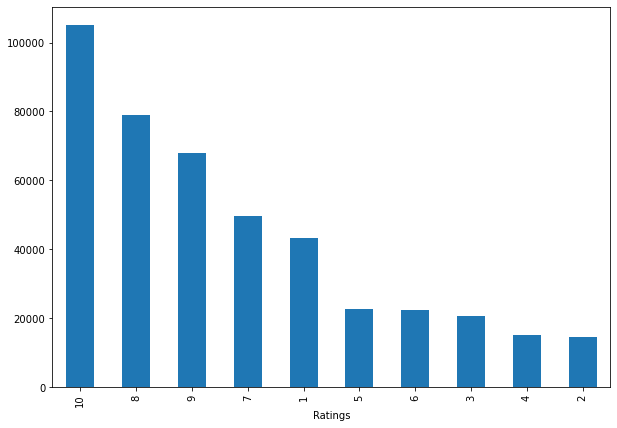

In [12]:
data['rating'].value_counts().plot(kind='bar')
plt.xlabel('Ratings')
plt.show

3.Check the effectiveness of the drugs 

<function matplotlib.pyplot.show(close=None, block=None)>

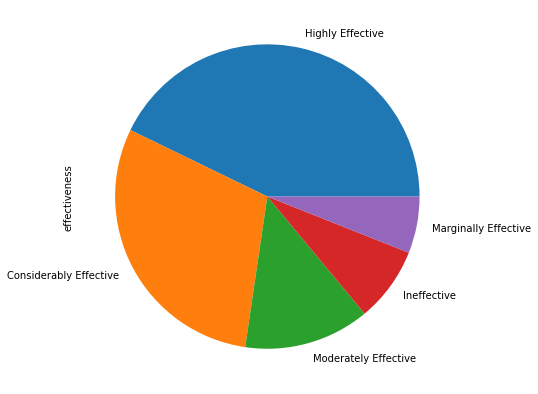

In [13]:
data['effectiveness'].value_counts().plot(kind='pie')
plt.show

4. Check the various conditions the medicine cures(top 10) since they are over thousand


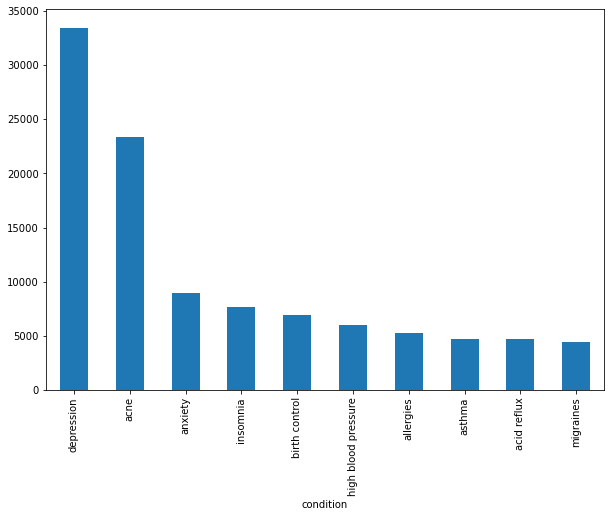

In [14]:
data['condition'].value_counts().head(10).plot(kind='bar')
plt.xlabel('condition')
plt.show()

Most of the drugs cures depression. Then comes acne. The third drug is for anxiety

5. Checking the target variable(sideEffects)

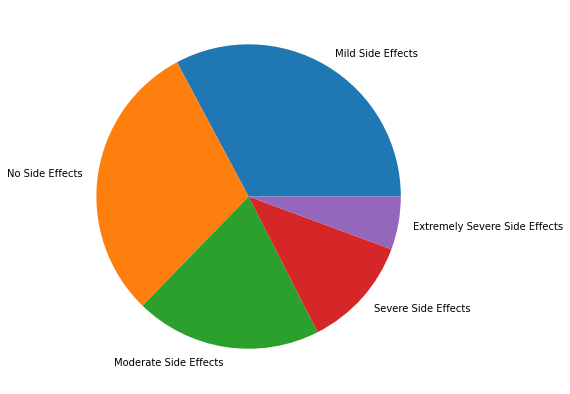

In [15]:
data['sideEffects'].value_counts().plot(kind='pie')
plt.ylabel("")
plt.show()

# Bi-variate Analysis

1. Plot corelation between effectiveness and rating

In [16]:
corr_comp = data.loc[data["effectiveness"] == "Highly Effective"]["effectiveness"].value_counts().to_frame("effectiveness")
corr_comp

,effectiveness
Highly Effective,188584


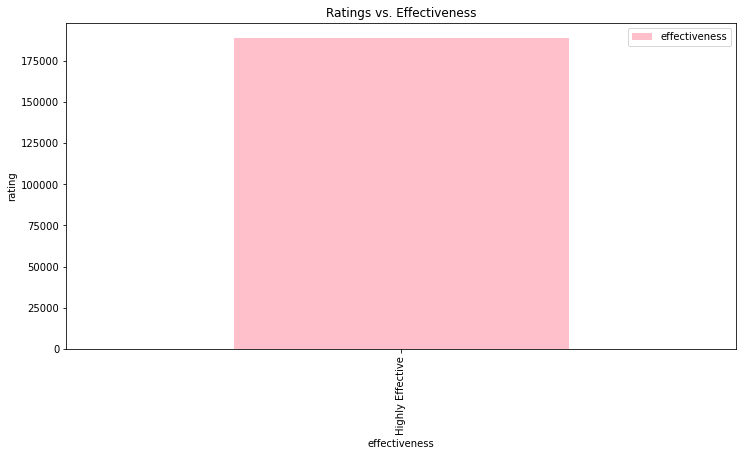

In [17]:
corr_comp.plot.bar(figsize = (12,6) , title = "Ratings vs. Effectiveness",color='pink')
plt.xlabel("effectiveness")
plt.ylabel("rating")
plt.show()

<AxesSubplot:>

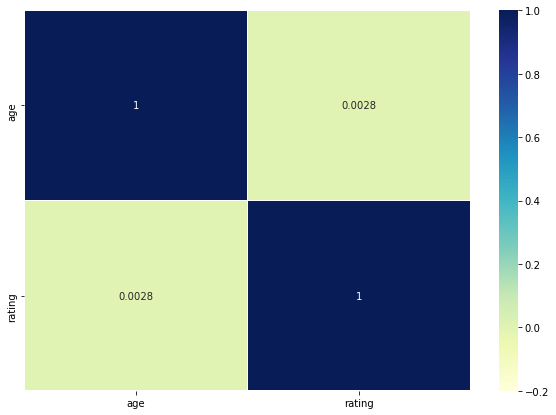

In [18]:
corr=data.corr()
sns.heatmap(corr,vmin=-.2,vmax=1,annot=True,linewidth=0.2,cmap='YlGnBu')

# Data Preprocessing

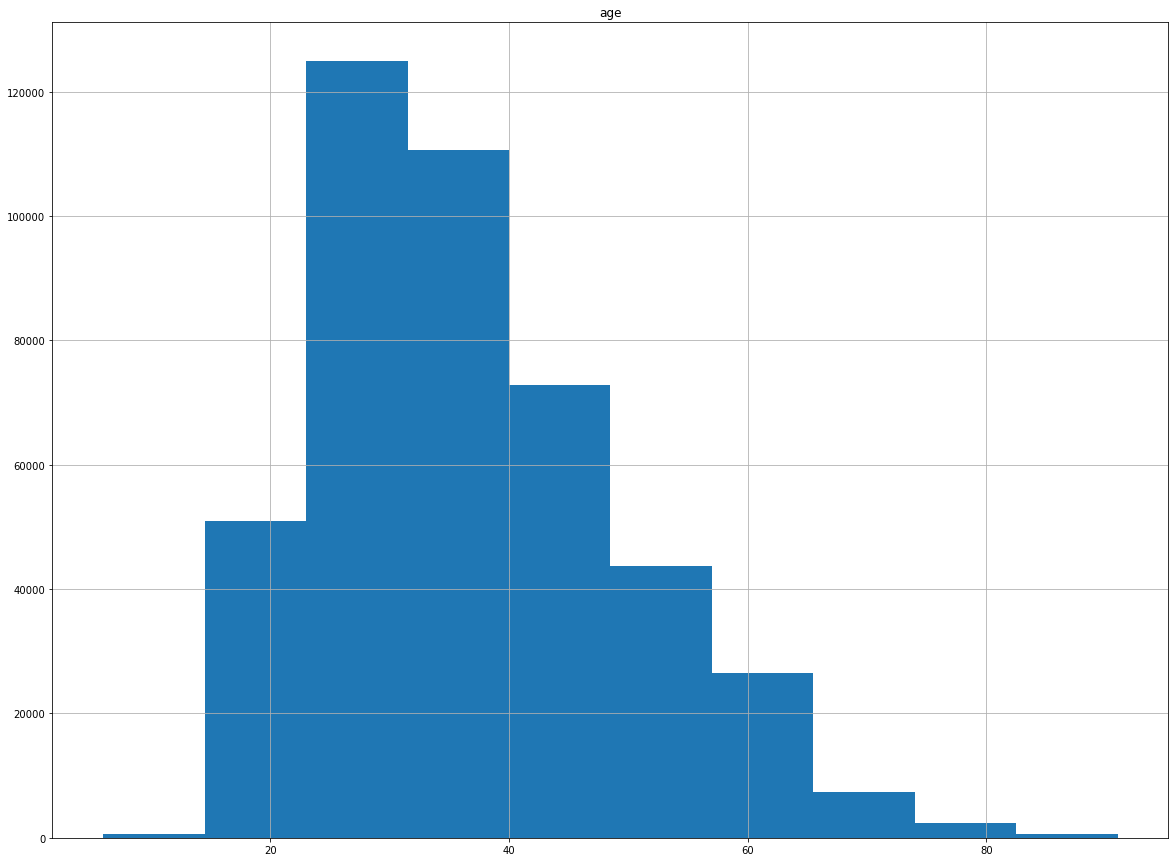

In [19]:
#Filling missing values
freqgraph = data.select_dtypes(include = ['float'])
freqgraph.hist(figsize= (20,15))
plt.show()

In [20]:
data.columns

Index(['name', 'age', 'gender', 'race', 'urlDrugName', 'rating',
       'effectiveness', 'condition', 'sideEffects'],
      dtype='object')

In [21]:
#data['condition'] = data['condition'].fillna(data['condition'].mode())

In [22]:
# Checking the most frequent value to fill NaN
data['urlDrugName'].mode(),data['condition'].mode()

(0    lexapro
 dtype: object,
 0    depression
 dtype: object)

In [23]:
# Filling NaN values
data['urlDrugName'] = data['urlDrugName'].fillna("lexapro")
data['condition'] = data['condition'].fillna("depression")

In [24]:
# To verify if any null values present
data.isnull().sum()

name             0
age              0
gender           0
race             0
urlDrugName      0
rating           0
effectiveness    0
condition        0
sideEffects      0
dtype: int64

# Check and handle the outliers

C:\Users\Revathi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Revathi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

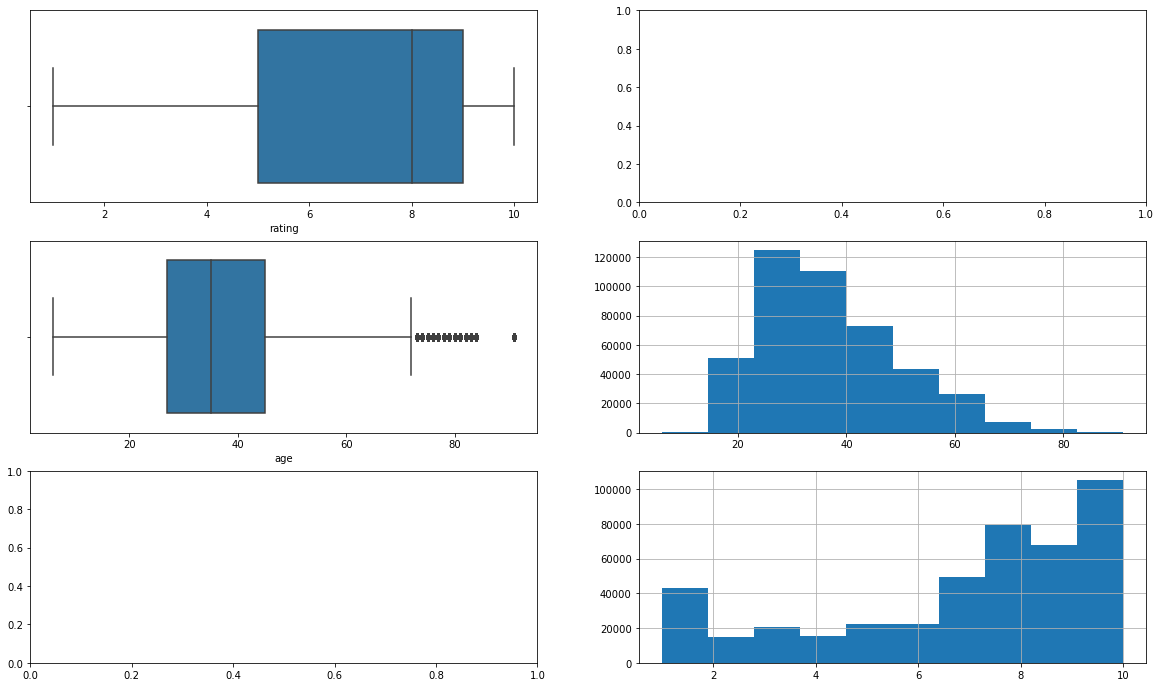

In [25]:
fig, ax = plt.subplots(3,2,figsize=(20, 12))
sns.boxplot(data['age'],data=data,ax=ax[1,0])
data['age'].hist(ax=ax[1,1])
sns.boxplot(data['rating'],data=data,ax=ax[0,0])
data['rating'].hist(ax=ax[2,1])

In [26]:
print('skewness value of age: ',data['age'].skew())
print('skewness value of rating: ',data['rating'].skew())

skewness value of age:  0.7147347481188853
skewness value of rating:  -0.8699600305337749


The skewness value should be within the range of -1 to 1 for a normal distribution, any major changes from this value may indicate the presence of outliers.

In [27]:
#droping the outliers by removing all the values that are below the 25th percentile and above the 75th percentile of the ‘age’
#variable.
Q11 = data['age'].quantile(0.25)
Q13 = data['age'].quantile(0.75)
IQR1 = Q13 - Q11
whisker_width1 = 1.5
lower_whisker1 = Q11 -(whisker_width1*IQR1)
upper_whisker1 = Q13 + (whisker_width1*IQR1)
data['age']=np.where(data['age']>upper_whisker1,upper_whisker1,np.where(data['age']<lower_whisker1,lower_whisker1,data['age']))

#droping the outliers by removing all the values that are below the 25th percentile and above the 75th percentile of the ‘rating’
#variable.
Q11 = data['rating'].quantile(0.25)
Q13 = data['rating'].quantile(0.75)
IQR1 = Q13 - Q11
whisker_width1 = 1.5
lower_whisker1 = Q11 -(whisker_width1*IQR1)
upper_whisker1 = Q13 + (whisker_width1*IQR1)
data['rating']=np.where(data['rating']>upper_whisker1,upper_whisker1,np.where(data['rating']<lower_whisker1,lower_whisker1,data['rating']))


C:\Users\Revathi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Revathi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

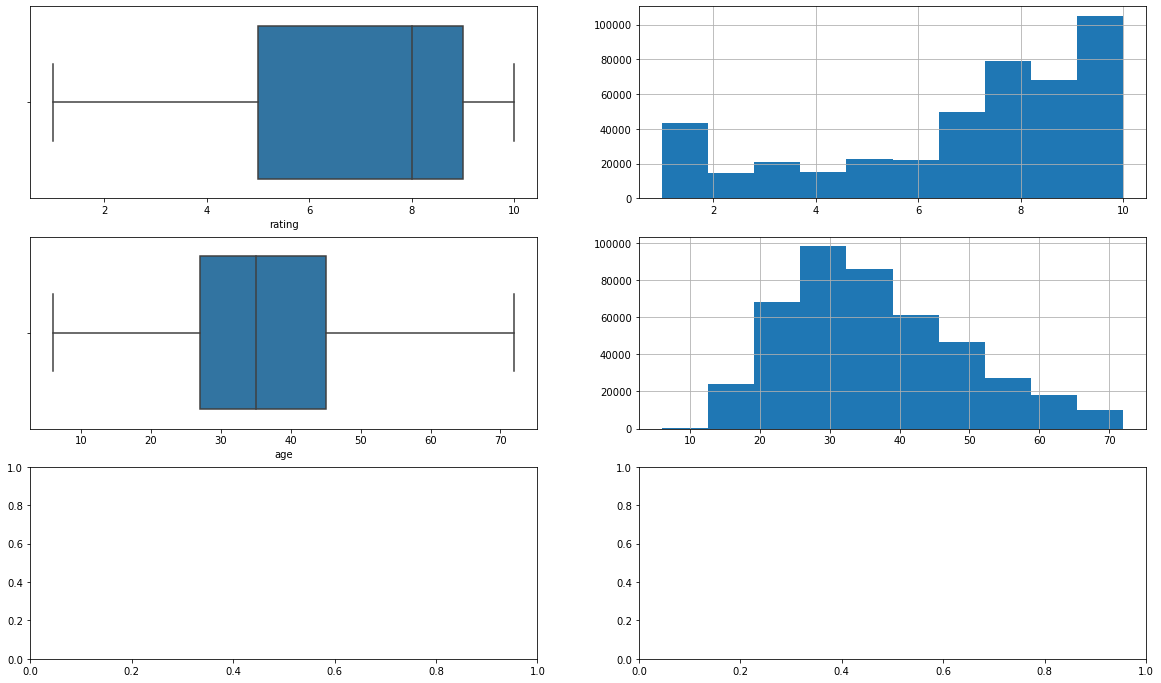

In [28]:
fig, ax = plt.subplots(3,2,figsize=(20, 12))
sns.boxplot(data['age'],data=data,ax=ax[1,0])
data['age'].hist(ax=ax[1,1])
sns.boxplot(data['rating'],data=data,ax=ax[0,0])
data['rating'].hist(ax=ax[0,1])

In [29]:
print('skewness value of age: ',data['age'].skew())
print('skewness value of rating: ',data['rating'].skew())

skewness value of age:  0.6413274481093832
skewness value of rating:  -0.8699600305337749


Here all the outliers are handled.

In [30]:
data.columns

Index(['name', 'age', 'gender', 'race', 'urlDrugName', 'rating',
       'effectiveness', 'condition', 'sideEffects'],
      dtype='object')

# Put target into a separate column

In [31]:
target = data.pop("sideEffects")
data.head()

,name,age,gender,race,urlDrugName,rating,effectiveness,condition
0,Tim Elliot,53.0,M,Asian,enalapril,4.0,Highly Effective,management of congestive heart failure
1,Lewis Lee Lembke,47.0,M,White,ortho-tri-cyclen,1.0,Highly Effective,birth prevention
2,John Paul Quintero,23.0,M,Hispanic,ponstel,10.0,Highly Effective,menstrual cramps
3,Matthew Hoffman,32.0,M,White,prilosec,3.0,Marginally Effective,acid reflux
4,Michael Rodriguez,39.0,M,Hispanic,lyrica,2.0,Marginally Effective,fibromyalgia


# Convert categorical data to numeric data

In [32]:
cols = ['urlDrugName','effectiveness','condition','name','race', 'gender']    

for x in cols:
    data[x] = pd.factorize(data[x])[0]
    
target =   pd.factorize(target)[0]  

data.head()

,name,age,gender,race,urlDrugName,rating,effectiveness,condition
0,0,53.0,0,0,0,4.0,0,0
1,1,47.0,0,1,1,1.0,0,1
2,2,23.0,0,2,2,10.0,0,2
3,3,32.0,0,1,3,3.0,1,3
4,4,39.0,0,2,4,2.0,1,4


# Scaling the data

In [33]:
scaler = StandardScaler()

In [34]:
data= scaler.fit_transform(data)

In [35]:
data

array([[-1.73020231e+00,  1.31408858e+00, -2.17960902e-01, ...,
        -1.02357200e+00, -1.04690799e+00, -9.42183686e-01],
       [-1.72948740e+00,  8.36087130e-01, -2.17960902e-01, ...,
        -2.04501478e+00, -1.04690799e+00, -9.39844583e-01],
       [-1.72877250e+00, -1.07591867e+00, -2.17960902e-01, ...,
         1.01931357e+00, -1.04690799e+00, -9.37505479e-01],
       ...,
       [ 1.73566510e+00, -9.16584857e-01,  4.58797881e+00, ...,
        -2.12921338e-03,  1.49181389e+00, -9.11775338e-01],
       [ 1.73638001e+00, -1.15558558e+00, -2.17960902e-01, ...,
        -2.12921338e-03, -1.04690799e+00,  1.75948112e+00],
       [ 1.73709492e+00, -4.38583406e-01, -2.17960902e-01, ...,
         1.01931357e+00, -1.04690799e+00, -5.88979023e-01]])

# Splitting the data into train

In [36]:
x_train, x_test, y_train, y_test = train_test_split(data,target,test_size=0.25,random_state=0)

# Using SVM

In [ ]:
svm_clf = SVC().fit(x_train , y_train)

In [ ]:
svm_pred =  svm_clf.predict(x_test)

In [ ]:
print(classification_report(y_test, svm_pred))

# Using Random Classifier


In [ ]:
rf_clf = RandomForestClassifier().fit(x_train , y_train)
rf_pred =  rf_clf.predict(x_test)
print(classification_report(y_test, rf_pred))